In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as folium


In [3]:
# Load the CSV data into a DataFrame
VSRR_Provisional = 'VSRR_Provisional_County-Level_Drug_Overdose_Death_Counts_20240909.csv'
VSRR_Provisional_df = pd.read_csv(VSRR_Provisional)

#print the df
VSRR_Provisional_df.head(3)

,Data as of,Year,Month,ST_ABBREV,STATE_NAME,COUNTYNAME,FIPS,STATEFIPS,COUNTYFIPS,CODE2013,Provisional Drug Overdose Deaths,Footnote,Percentage Of Records Pending Investigation,HistoricalDataCompletenessNote,MonthEndingDate,Start Date,End Date
0,07/07/2024,2020,1,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.56,NaN,01/31/2020,01/31/2020,12/31/2023
1,07/07/2024,2020,2,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.55,NaN,02/29/2020,01/31/2020,12/31/2023
2,07/07/2024,2020,3,AL,Alabama,Autauga,1001,1,1,3,NaN,One or more data cells have counts between 1-9...,0.55,NaN,03/31/2020,01/31/2020,12/31/2023


In [15]:
# Select columns of interest (including actual death count column, assuming 'Death Count' exists)
columns_to_keep = ['Year', 'Month', 'STATE_NAME', 'COUNTYNAME', 'Provisional Drug Overdose Deaths']
VSRR_Provisional_df = VSRR_Provisional_df[columns_to_keep]

VSRR_Provisional_df

VSRR_Provisional_df.to_csv('VSRR_Provisional_df.csv', index=False)

In [5]:
# Filter the DataFrame for records where STATE_NAME is Ohio
ohio_df = VSRR_Provisional_df[VSRR_Provisional_df['STATE_NAME'] == 'Ohio']

In [6]:
# Rename columns for clarity
ohio_df = ohio_df.rename (columns={
    'Year': 'Year of Death',
    'Month': 'Month of Death',
    'Provisional Drug Overdose Deaths': 'Death Count'
    })

In [18]:
# Create a DataFrame with all combinations of Year and Month
years = [2020, 2021, 2022, 2023]  # Define the years of interest
months = list(range(1, 13))  # Define months from 1 to 12

full_year_month_df = pd.MultiIndex.from_product([years, months], names=['Year of Death', 'Month of Death']).to_frame(index=False)

full_year_month_df.to_csv('full_year_month_df.csv', index=False)

full_year_month_df.head(12)

,Year of Death,Month of Death
0,2020,1
1,2020,2
2,2020,3
3,2020,4
4,2020,5
5,2020,6
6,2020,7
7,2020,8
8,2020,9
9,2020,10


In [8]:
# Merge with the Ohio DataFrame to include all year-month combinations
ohio_full_df = full_year_month_df.merge(ohio_df, on=['Year of Death', 'Month of Death'], how='left')

In [9]:
# Fill missing death counts with 0 for months with no data
ohio_full_df['Death Count'] = ohio_full_df['Death Count'].fillna(0)

In [10]:
# Group by Year of Death to get the sum of death counts for each year
yearly_death_counts = ohio_full_df.groupby('Year of Death')['Death Count'].sum().reset_index()

In [11]:
# Print the results
for index, row in yearly_death_counts.iterrows():
    print(f"Sum of Death Counts for {row['Year of Death']}: {row['Death Count']}")
    print("-" * 20)

Sum of Death Counts for 2020.0: 55980.0
--------------------
Sum of Death Counts for 2021.0: 64147.0
--------------------
Sum of Death Counts for 2022.0: 60923.0
--------------------
Sum of Death Counts for 2023.0: 60037.0
--------------------


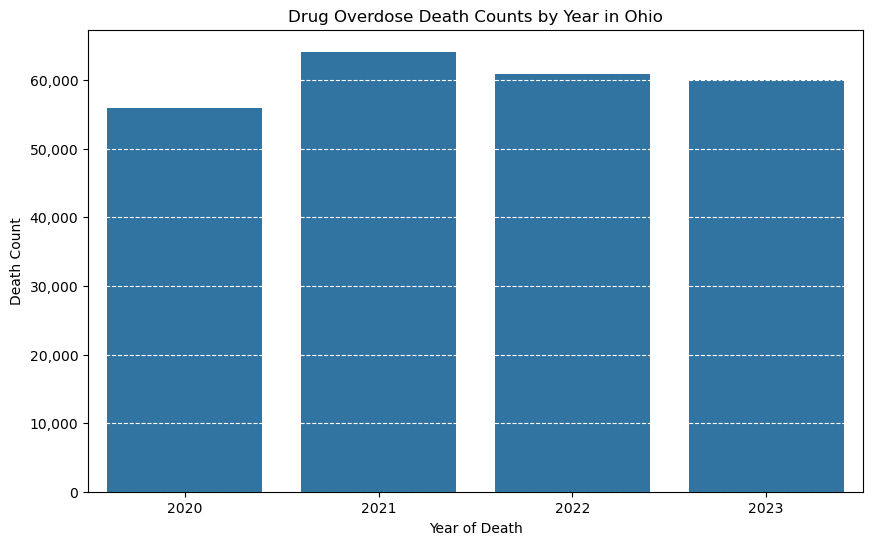

In [19]:
# Plotting for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_death_counts, x='Year of Death', y='Death Count')

# Add commas to the y-axis labels
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True, which='both', axis='y', linestyle='--', color='white')

# Set title and labels
plt.title('Drug Overdose Death Counts by Year in Ohio')
plt.xlabel('Year of Death')
plt.ylabel('Death Count')
# Save the plot as a PNG file
plt.savefig('drug_overdose_death_counts.png', format='png')

# Show the plot
plt.show()

Sum of Death Counts for 2020.0: 55980.0
--------------------
Sum of Death Counts for 2021.0: 64147.0
--------------------
Sum of Death Counts for 2022.0: 60923.0
--------------------
Sum of Death Counts for 2023.0: 60037.0
--------------------


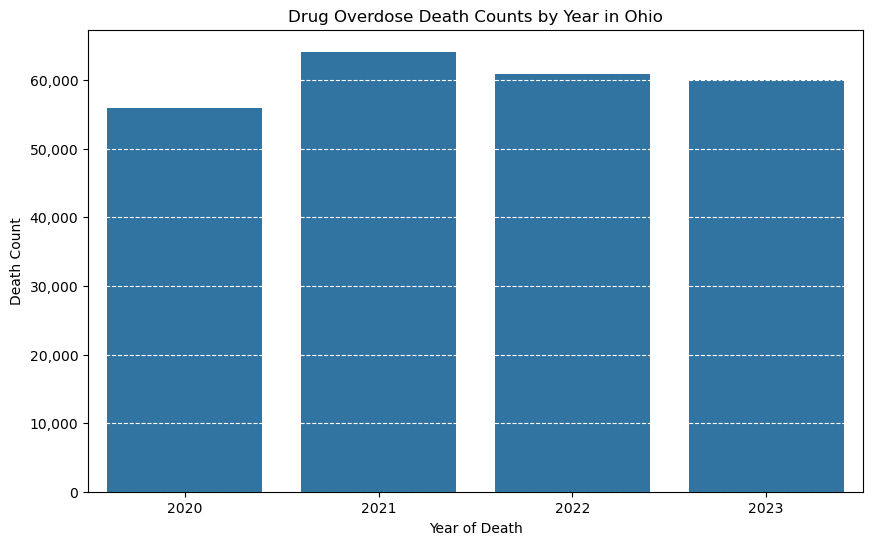

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the CSV data into a DataFrame
VSRR_Provisional = 'VSRR_Provisional_County-Level_Drug_Overdose_Death_Counts_20240909.csv'
VSRR_Provisional_df = pd.read_csv(VSRR_Provisional)

# Select columns of interest (including actual death count column, assuming 'Death Count' exists)
columns_to_keep = ['Year', 'Month', 'STATE_NAME', 'COUNTYNAME', 'Provisional Drug Overdose Deaths']
VSRR_Provisional_df = VSRR_Provisional_df[columns_to_keep]

# Filter the DataFrame for records where STATE_NAME is Ohio
ohio_df = VSRR_Provisional_df[VSRR_Provisional_df['STATE_NAME'] == 'Ohio']

# Rename columns for clarity
ohio_df = ohio_df.rename(columns={
    'Year': 'Year of Death',
    'Month': 'Month of Death',
    'Provisional Drug Overdose Deaths': 'Death Count'  # Assuming this column tracks the number of deaths
})

# Create a DataFrame with all combinations of Year and Month
years = [2020, 2021, 2022, 2023]  # Define the years of interest
months = list(range(1, 13))  # Define months from 1 to 12

full_year_month_df = pd.MultiIndex.from_product([years, months], names=['Year of Death', 'Month of Death']).to_frame(index=False)

# Merge with the Ohio DataFrame to include all year-month combinations
ohio_full_df = full_year_month_df.merge(ohio_df, on=['Year of Death', 'Month of Death'], how='left')

# Fill missing death counts with 0 for months with no data
ohio_full_df['Death Count'] = ohio_full_df['Death Count'].fillna(0)

# Group by Year of Death to get the sum of death counts for each year
yearly_death_counts = ohio_full_df.groupby('Year of Death')['Death Count'].sum().reset_index()

# Print the results
for index, row in yearly_death_counts.iterrows():
    print(f"Sum of Death Counts for {row['Year of Death']}: {row['Death Count']}")
    print("-" * 20)

# Plotting for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_death_counts, x='Year of Death', y='Death Count')

# Add commas to the y-axis labels
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True, which='both', axis='y', linestyle='--', color='white')

# Set title and labels
plt.title('Drug Overdose Death Counts by Year in Ohio')
plt.xlabel('Year of Death')
plt.ylabel('Death Count')

# Show the plot
plt.show()